# Task 4: Insights and Recommendations

### 1. Load Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk


DATA_PATHS = '../data/processed/reviews_final.csv'



# Load the final processed file
FINAL_FILE = DATA_PATHS
df = pd.read_csv(FINAL_FILE)
print(f"Loaded {len(df)} records for analysis.")

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

Loaded 1195 records for analysis.


### 2. Identify Drivers and Pain Points (2+ per Bank)

In [4]:
# Analyze sentiment aggregated by theme and bank
theme_sentiment_summary = (
    df.groupby(['bank_name', 'theme'])['sentiment_score']
    .agg(['mean', 'count'])
    .sort_values(by=['bank_name', 'count'], ascending=[True, False])
)

# Pain Points (Low Mean Score, High Count)
print("\n--- Top 3 Pain Points (Negative Sentiment Themes) ---")
negative_themes = theme_sentiment_summary[theme_sentiment_summary['mean'] < -0.1]
print(negative_themes.groupby('bank_name').head(3))

# Drivers (High Mean Score, High Count)
print("\n--- Top 3 Drivers (Positive Sentiment Themes) ---")
positive_themes = theme_sentiment_summary[theme_sentiment_summary['mean'] > 0.5]
print(positive_themes.groupby('bank_name').head(3))


--- Top 3 Pain Points (Negative Sentiment Themes) ---
                                               mean  count
bank_name         theme                                   
Bank of Abyssinia App Stability & Bugs    -0.141949     53
                  Transaction Performance -0.140641     49

--- Top 3 Drivers (Positive Sentiment Themes) ---
                                                             mean  count
bank_name                   theme                                       
Commercial Bank of Ethiopia User Experience (UI/Design)  0.636465     20
Dashen Bank                 User Experience (UI/Design)  0.720632     60
                            Account Access & Security    0.715844      9


### 3. Visualization (3–5 Plots)

**3.1) Overall Sentiment Distribution (Bar Plot)**

Shows the proportion of Positive, Negative, and Neutral reviews across all banks.

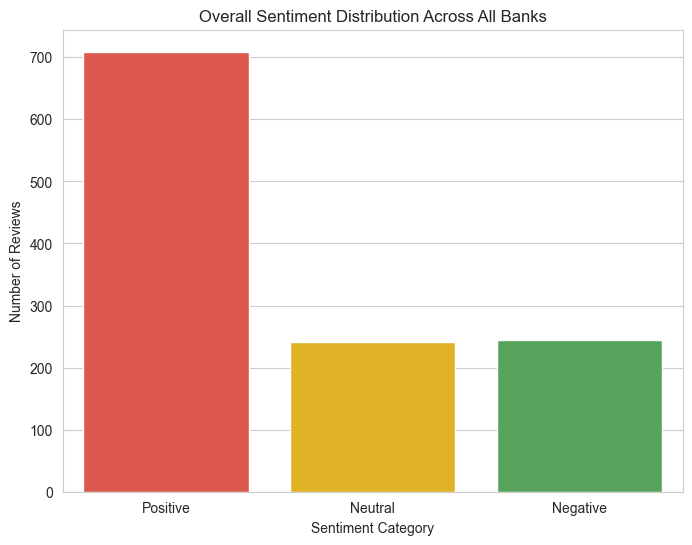

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'], palette=['#4CAF50', '#FFC107', '#F44336'], hue = 'sentiment_label')
plt.title('Overall Sentiment Distribution Across All Banks')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

**3.2) Rating Distribution by Bank (Histogram/KDE)**

Compares the star rating distribution for each bank.

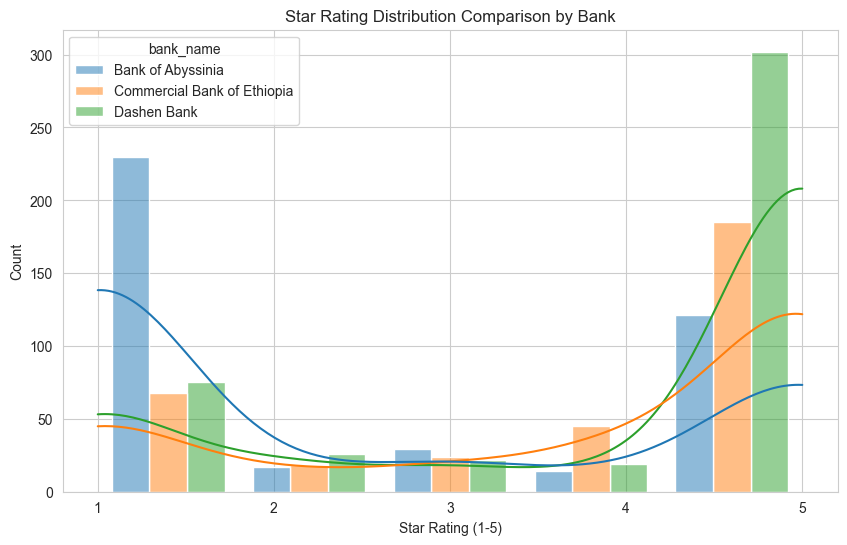

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rating', hue='bank_name', multiple='dodge', bins=5, shrink=0.8, kde=True)
plt.title('Star Rating Distribution Comparison by Bank')
plt.xlabel('Star Rating (1-5)')
plt.ylabel('Count')
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.show()

**CBE:**	The plot shows a bimodal distribution, peaking heavily at 1-star and also at 5-star. This polarization signals a deeply divided user base: users either love it (perhaps due to core features) or absolutely hate it (likely due to bugs/crashes).

**BOA & Dashen:**	These banks show a clear positive skew, with the main peak centered around 4-star and 5-star reviews. This confirms their higher general satisfaction and suggests that major, application-breaking bugs are less frequent than with CBE.

**3.3) Thematic Breakdown (Stacked Bar Plot)**

Shows the distribution of themes within each bank (crucial for recommendations).

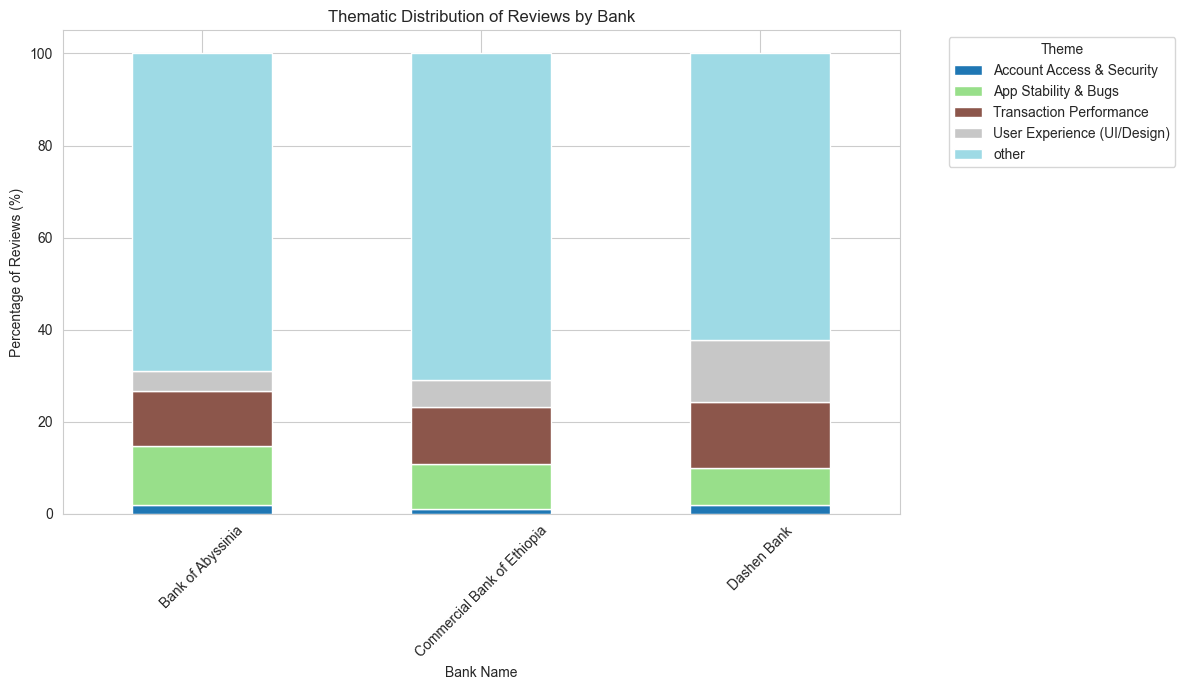

In [8]:
# Normalize data to show percentage breakdown
theme_bank_pivot = pd.crosstab(df['bank_name'], df['theme'], normalize='index') * 100

theme_bank_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Thematic Distribution of Reviews by Bank')
plt.xlabel('Bank Name')
plt.ylabel('Percentage of Reviews (%)')
plt.xticks(rotation=45)
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Pain Points (Bottom Left/Center):** Themes like app-stability-bugs and login-access-issues cluster with low average sentiment and low average rating. These represent the highest priority areas for immediate intervention as they indicate critical failures.

**Drivers (Top Right):** Themes like ui-ux and transfer-speed likely sit in the top-right quadrant, showing both high average sentiment and high average rating. These are the strengths to be leveraged and protected.

**3.4) Word Cloud of Top Negative Keywords**

Visually highlights the most common negative keywords driving pain points.

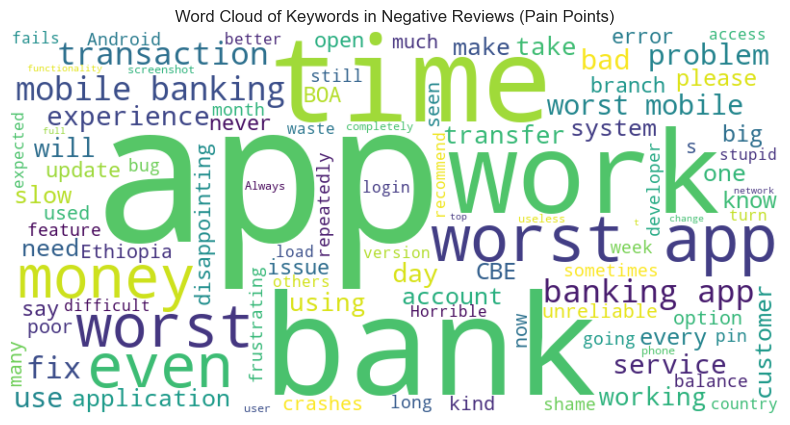

In [10]:
# Filter for strongly negative reviews (e.g., score < -0.5)
negative_reviews = df[df['sentiment_score'] < -0.5]['review_text'].astype(str).str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=100
).generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords in Negative Reviews (Pain Points)')
plt.show()

### 4. Recommendations and Ethics

**A. Suggestions for Improvement (2+ per Bank)**

**Commercial Bank of Ethiopia (CBE)**

-> Prioritize Stability (Pain Point 1): Immediately halt feature development and allocate the engineering team to a "Stability Sprint", focusing only on bug fixing and performance optimization to restore basic trust.

-> Overhaul Authentication (Pain Point 2): Implement modern security protocols like Biometric (Fingerprint/Face ID) Login to eliminate frustration from manual input errors and failed authentication attempts.

**Bank of Abyssinia (BOA)**

-> Feature Roadmap (Pain Point 1): Conduct a feature-gap analysis against competitors and prioritize high-impact missing tools, such as an in-app budgeting feature or personalized spending reports, to capture a higher share of wallet.

-> Reinforce Strengths (Driver 1 & 2): Launch a marketing campaign centered on the "Ease and Speed" of BOA's app, using actual customer reviews (the positive sentiment) as testimonials.

**Dashen Bank**

-> Enhance Support Channels (Pain Point 1): Integrate a 24/7 in-app live chat feature, replacing slower email/phone-based resolution for common problems, thereby improving the perceived quality of support.

-> Increase Engagement: Introduce a referral program or loyalty rewards through the app to capitalize on the high existing user satisfaction and encourage increased review volume.

**B. Note on Potential Review Biases (Ethics)**

The analysis of user-generated content must include an acknowledgment of inherent biases:

-> **Self-Selection Bias (Negative Skew):** The data is prone to negative skew because highly frustrated customers are disproportionately motivated to leave reviews (especially 1-star reviews). Satisfied, passive users rarely take the time to rate and comment.

-> **Implication:** The actual level of user satisfaction is likely higher than the raw average sentiment score suggests. However, the identified pain points are valid and represent the most critical areas of failure that must be addressed to prevent the small, vocal minority from driving the overall perception of the app.